# Advanced Data Visualization Techniques

## Learning Objectives
By the end of this notebook, you will understand:
- Advanced visualization techniques beyond basic charts
- How to create pair plots, violin plots, density plots, and bubble charts
- Specialized visualizations: treemaps, radar charts, and word clouds
- When and how to use each advanced visualization type
- Best practices for complex multi-variable data visualization

## Introduction
Advanced visualizations go beyond basic charts to reveal complex patterns, relationships, and structures in data. This notebook demonstrates seven sophisticated visualization techniques:

1. **Pair Plot**: Matrix of scatter plots for all variable combinations
2. **Violin Plot**: Distribution shape comparison across categories
3. **Density Plot**: Smooth probability density estimation
4. **Bubble Plot**: Three-dimensional data representation
5. **Treemap**: Hierarchical data as nested rectangles
6. **Radar Chart**: Multi-dimensional data on circular axes
7. **Word Cloud**: Text frequency visualization

Each visualization preserves the original styling and reveals unique insights about the data.

In [1]:
# Import the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

from wordcloud import WordCloud

print("Libraries imported successfully!")
print("Ready to create advanced data visualizations")
print("Using matplotlib, seaborn, squarify, and wordcloud for sophisticated analysis")

Libraries imported successfully!
Ready to create advanced data visualizations
Using matplotlib, seaborn, squarify, and wordcloud for sophisticated analysis


## Step 1: Load and Explore the Dataset

Let's load the larger sample dataset that contains diverse data types for advanced visualization demonstrations.

In [2]:
# Load the CSV file.
df = pd.read_csv("./data/sample_data_1000.csv")

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head())

print(f"\nDataset characteristics:")
print(f"- Total samples: {df.shape[0]}")
print(f"- Total features: {df.shape[1]}")

# Analyze data types
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"- Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"- Categorical columns ({len(categorical_cols)}): {categorical_cols}")

print(f"\nKey statistics:")
print(f"- Categories in 'Category': {df['Category'].nunique()}")
print(f"- Unique words in 'Word1': {df['Word1'].nunique()}")
print(f"- Value ranges: Value1({df['Value1'].min():.1f}-{df['Value1'].max():.1f}), Value6({df['Value6'].min():.1f}-{df['Value6'].max():.1f})")

Dataset loaded successfully!
Dataset shape: (1000, 15)
Columns: ['Category', 'Value1', 'Value2', 'Value3', 'Value4', 'Value5', 'Date', 'Score1', 'Score2', 'Flag', 'Word1', 'Value6', 'Value7', 'Score3', 'Label']

First few rows:
  Category  Value1  Value2  Value3     Value4      Value5        Date  Score1  \
0        C      72     615     200  38.183244   96.488721  2023-01-01       4   
1        D      26     198     107  40.687286  113.373096  2023-01-02       4   
2        A      82     496     432  47.477843  101.961351  2023-01-03       2   
3        C      42     588     299  42.918641  125.917436  2023-01-04       1   
4        C      93     138     186  20.310503   85.623352  2023-01-05       1   

   Score2  Flag    Word1     Value6      Value7  Score3 Label  
0       3     0     Mary  49.555700  868.266936       4     X  
1       4     0  Zachary  16.051657  317.734955       5     Y  
2       8     0   Victor  51.822052  888.663114       1     Z  
3       9     1   Xander  83.

## Step 2: Pair Plot (Scatterplot Matrix)

Let's start with a pair plot to explore relationships between all numerical variables simultaneously.

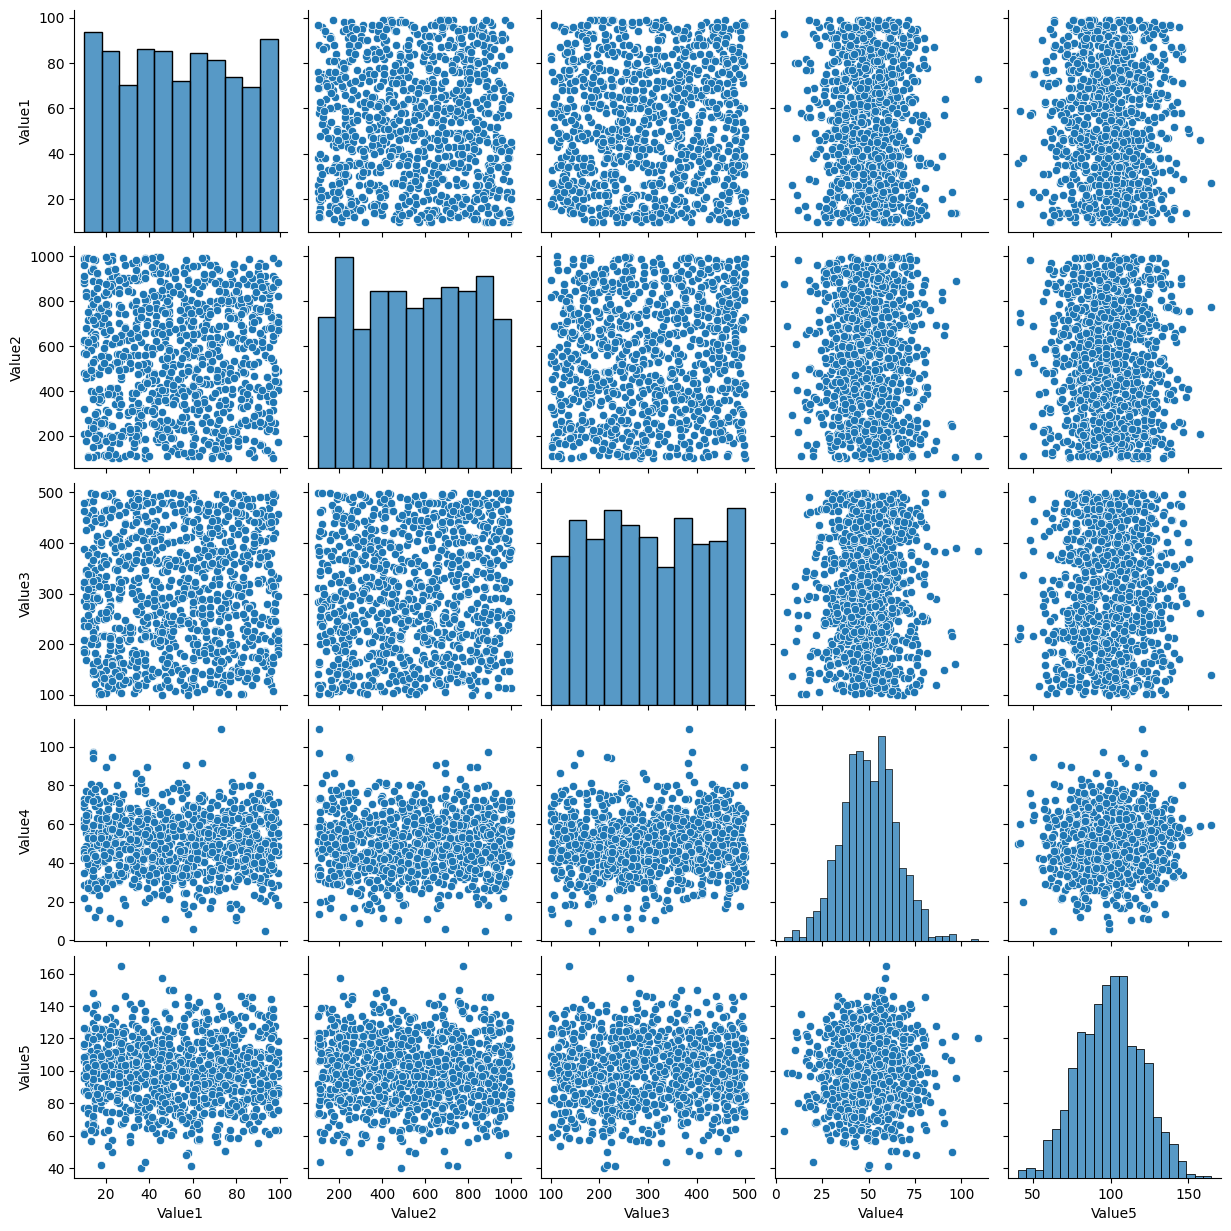

✅ Pair Plot created!
📊 Shows relationships between Value1-Value5
🔍 Diagonal shows distributions, off-diagonal shows correlations
💡 Look for linear relationships, clusters, and outliers
📈 Each subplot represents one variable pair combination


In [3]:
# Define the plot style.
with plt.style.context("fast"):

    # Pair Plot (Scatterplot Matrix).
    pair_plot = sns.pairplot(df.iloc[:, 1:6])
    plt.show()

print("✅ Pair Plot created!")
print("📊 Shows relationships between Value1-Value5")
print("🔍 Diagonal shows distributions, off-diagonal shows correlations")
print("💡 Look for linear relationships, clusters, and outliers")
print("📈 Each subplot represents one variable pair combination")

## Step 3: Violin Plot

Violin plots combine box plots with kernel density estimation to show distribution shapes across categories.

/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_2030/2090113836.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Category", y="Value4", data=df, palette="Set2",


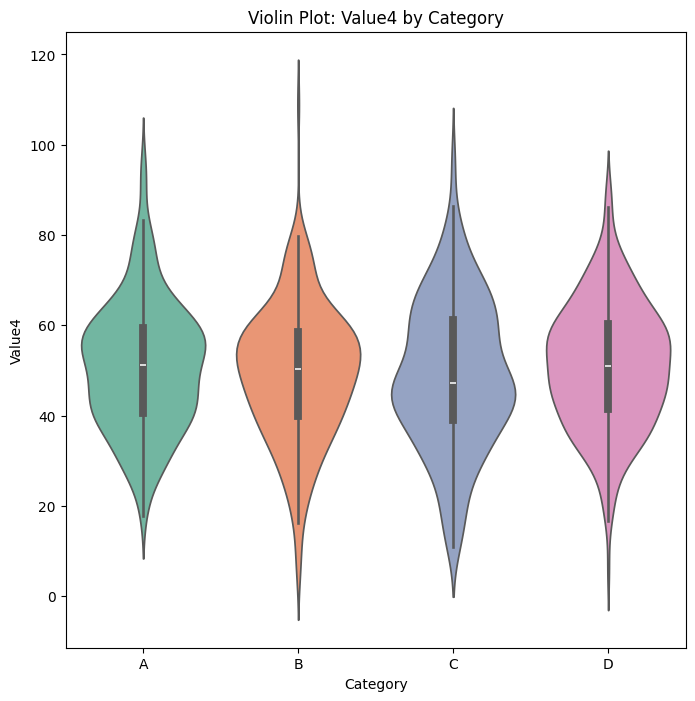

✅ Violin Plot created!
🎻 Shows distribution shape for Value4 across categories
📊 Width indicates density, white dot shows median
🎨 Color palette: Set2 (original styling preserved)
📈 Reveals distribution skewness, multimodality, and outliers


In [4]:
# Violin Plot.
plt.figure(figsize=(8, 8))
sns.violinplot(x="Category", y="Value4", data=df, palette="Set2",
               order=sorted(df["Category"].unique()))
plt.title("Violin Plot: Value4 by Category")
plt.show()

print("✅ Violin Plot created!")
print("🎻 Shows distribution shape for Value4 across categories")
print("📊 Width indicates density, white dot shows median")
print("🎨 Color palette: Set2 (original styling preserved)")
print("📈 Reveals distribution skewness, multimodality, and outliers")

## Step 4: Density Plot

Density plots provide smooth estimates of probability distributions using kernel density estimation.

/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_2030/3212452821.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Value4"], shade=True, color="#179E86")


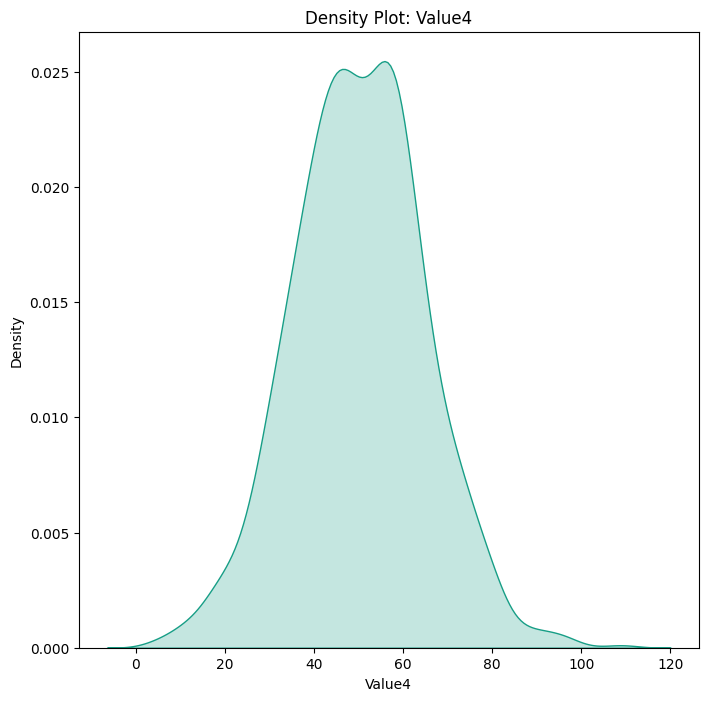

✅ Density Plot created!
🌊 Smooth probability density curve for Value4
🎨 Color: #179E86 (teal, original styling)
📊 Shows distribution shape without binning artifacts
🔬 Reveals fine-grained distribution characteristics


In [5]:
# Density Plot.
plt.figure(figsize=(8, 8))
sns.kdeplot(df["Value4"], shade=True, color="#179E86")
plt.title("Density Plot: Value4")
plt.show()

print("✅ Density Plot created!")
print("🌊 Smooth probability density curve for Value4")
print("🎨 Color: #179E86 (teal, original styling)")
print("📊 Shows distribution shape without binning artifacts")
print("🔬 Reveals fine-grained distribution characteristics")

## Step 5: Bubble Plot

Bubble plots add a third dimension to scatter plots by varying point sizes based on a third variable.

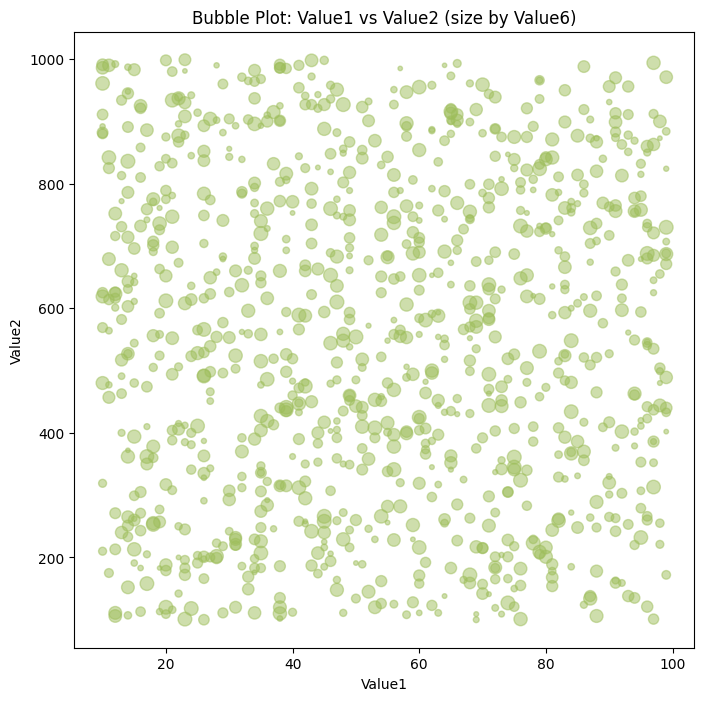

✅ Bubble Plot created!
💫 Three-dimensional data representation:
   • X-axis: Value1
   • Y-axis: Value2
   • Bubble size: Value6
🎨 Color: #9EBE5B (light green, original styling)
👁️ Alpha: 0.5 for overlapping bubble visibility
🔍 Reveals relationships between three variables simultaneously


In [6]:
# Bubble Plot (scatter plot with bubble size based on "Value6").
plt.figure(figsize=(8, 8))
plt.scatter(df["Value1"], df["Value2"], s=df["Value6"], alpha=0.5,
            color="#9EBE5B")
plt.title("Bubble Plot: Value1 vs Value2 (size by Value6)")
plt.xlabel("Value1")
plt.ylabel("Value2")
plt.show()

print("✅ Bubble Plot created!")
print("💫 Three-dimensional data representation:")
print("   • X-axis: Value1")
print("   • Y-axis: Value2") 
print("   • Bubble size: Value6")
print("🎨 Color: #9EBE5B (light green, original styling)")
print("👁️ Alpha: 0.5 for overlapping bubble visibility")
print("🔍 Reveals relationships between three variables simultaneously")

## Step 6: Treemap

Treemaps visualize hierarchical data as nested rectangles, with area proportional to values.

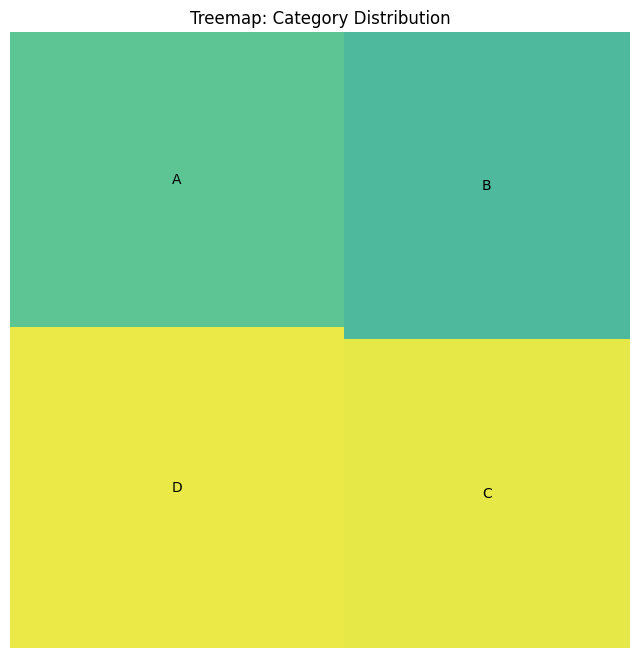

✅ Treemap created!
📦 Hierarchical visualization of category frequencies
📊 Rectangle area proportional to category count
🏷️ Labels show category names
🎨 Alpha: 0.8 for subtle transparency
🔄 Efficient space utilization for categorical data


In [7]:
# Treemap.
plt.figure(figsize=(8, 8))
treemap_data = df["Category"].value_counts()
squarify.plot(sizes=treemap_data, label=treemap_data.index, alpha=.8)
plt.title("Treemap: Category Distribution")
plt.axis("off")
plt.show()

print("✅ Treemap created!")
print("📦 Hierarchical visualization of category frequencies")
print("📊 Rectangle area proportional to category count")
print("🏷️ Labels show category names")
print("🎨 Alpha: 0.8 for subtle transparency")
print("🔄 Efficient space utilization for categorical data")

## Step 7: Radar Chart (Spider Plot)

Radar charts display multivariate data on axes radiating from a central point, ideal for comparing profiles.

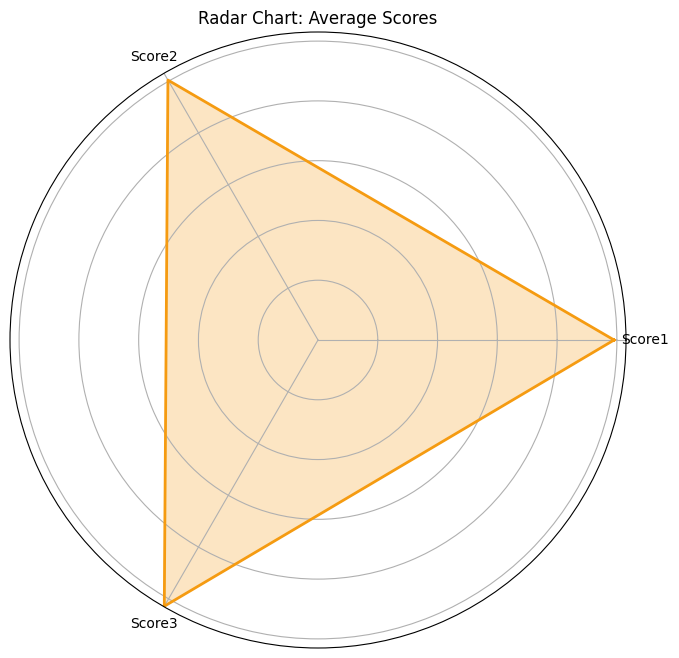

✅ Radar Chart created!
🕸️ Multi-dimensional profile visualization
📊 Shows average values for Score1, Score2, Score3
🎨 Color: #F59B11 (orange, original styling)
🔄 Circular layout reveals balance across dimensions
📈 Filled area shows overall performance profile


In [8]:
# Radar Chart (Spider Plot).
categories = ["Score1", "Score2", "Score3"]
radar_data = df[categories].mean().tolist()

# Radar chart data.
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
radar_data += radar_data[:1]
angles += angles[:1]

# Plot radar chart.
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={ "polar": True })
ax.fill(angles, radar_data, color="#F59B11", alpha=0.25)
ax.plot(angles, radar_data, color="#F59B11", linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Radar Chart: Average Scores")
plt.show()

print("✅ Radar Chart created!")
print("🕸️ Multi-dimensional profile visualization")
print("📊 Shows average values for Score1, Score2, Score3")
print("🎨 Color: #F59B11 (orange, original styling)")
print("🔄 Circular layout reveals balance across dimensions")
print("📈 Filled area shows overall performance profile")

## Step 8: Word Cloud

Word clouds visualize text data with word size proportional to frequency or importance.

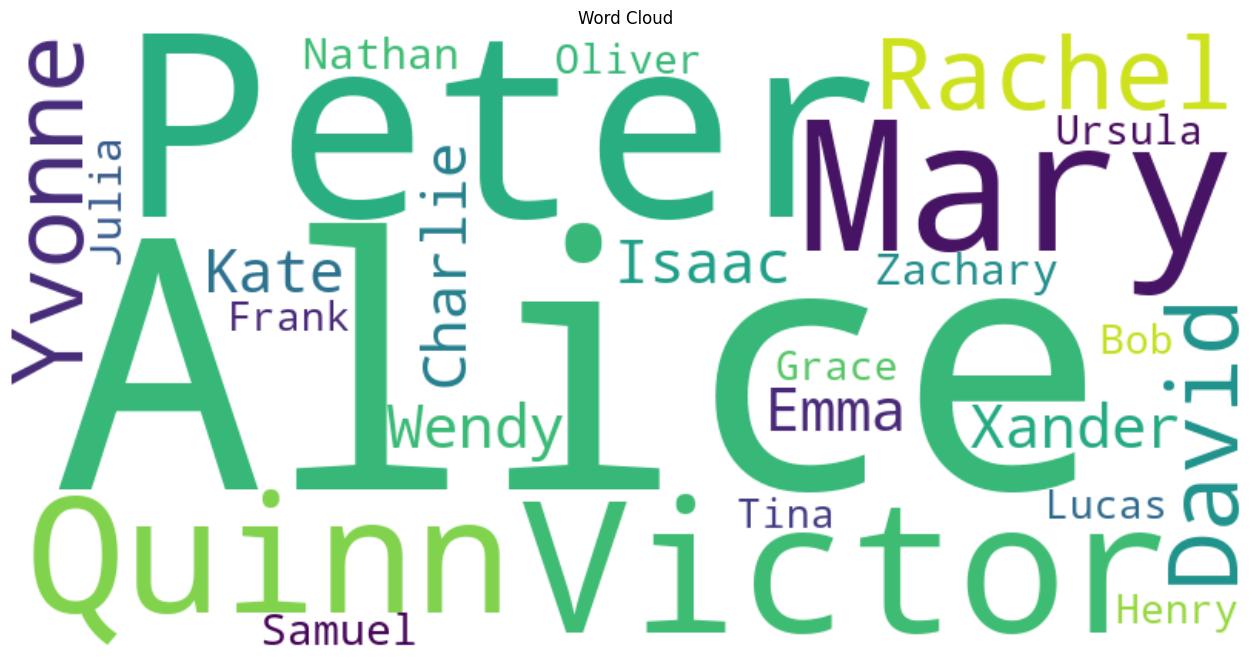

✅ Word Cloud created!
☁️ Text frequency visualization from Word1 column
📏 Size: 800x400 pixels (original dimensions)
🎨 Background: white (original styling)
🔤 Word size proportional to frequency
🎯 Interpolation: bilinear for smooth rendering
👁️ Reveals most common words at a glance


In [9]:
# Word Cloud.
plt.figure(figsize=(16, 8))
TEXT = " ".join(df["Word1"].values)
wordcloud = WordCloud(
    width=800, height=400, background_color="white").generate(TEXT)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud")
plt.show()

print("✅ Word Cloud created!")
print("☁️ Text frequency visualization from Word1 column")
print("📏 Size: 800x400 pixels (original dimensions)")
print("🎨 Background: white (original styling)")
print("🔤 Word size proportional to frequency")
print("🎯 Interpolation: bilinear for smooth rendering")
print("👁️ Reveals most common words at a glance")

## Step 9: Understanding Each Advanced Visualization

Let's analyze what each visualization reveals and when to use each technique.

In [10]:
print("ADVANCED VISUALIZATION ANALYSIS")
print("=" * 50)

visualization_analysis = {
    "Pair Plot (Scatterplot Matrix)": {
        "Purpose": "Explore all pairwise relationships simultaneously",
        "Best for": "Initial data exploration, correlation discovery",
        "Insights": "Variable relationships, distribution shapes, outlier patterns",
        "Data requirements": "Multiple numerical variables",
        "Limitations": "Becomes unwieldy with >10 variables"
    },
    "Violin Plot": {
        "Purpose": "Compare distribution shapes across groups",
        "Best for": "Understanding group differences beyond central tendency",
        "Insights": "Distribution skewness, multimodality, spread differences",
        "Data requirements": "Continuous variable + categorical grouping",
        "Limitations": "Requires sufficient data per group"
    },
    "Density Plot (KDE)": {
        "Purpose": "Smooth probability density estimation",
        "Best for": "Understanding distribution shape without binning",
        "Insights": "Continuous distribution characteristics, modes",
        "Data requirements": "Single continuous variable",
        "Limitations": "Sensitive to bandwidth selection"
    },
    "Bubble Plot": {
        "Purpose": "Three-dimensional data in 2D space",
        "Best for": "Exploring three-variable relationships",
        "Insights": "Triple correlations, size-position relationships",
        "Data requirements": "Three numerical variables",
        "Limitations": "Size perception can be misleading"
    },
    "Treemap": {
        "Purpose": "Hierarchical data as nested rectangles",
        "Best for": "Categorical frequencies, part-to-whole relationships",
        "Insights": "Relative proportions, hierarchy visualization",
        "Data requirements": "Categorical data with frequencies/values",
        "Limitations": "Difficult to compare similar-sized categories"
    },
    "Radar Chart": {
        "Purpose": "Multi-dimensional profiles on circular axes",
        "Best for": "Comparing profiles across multiple metrics",
        "Insights": "Performance patterns, strength/weakness profiles",
        "Data requirements": "Multiple numerical variables (typically 3-8)",
        "Limitations": "Variable order affects perception"
    },
    "Word Cloud": {
        "Purpose": "Text frequency visualization",
        "Best for": "Quick text analysis, presentation graphics",
        "Insights": "Most frequent terms, text themes",
        "Data requirements": "Text data or word frequencies",
        "Limitations": "Limited analytical depth, aesthetic over accuracy"
    }
}

for viz_type, details in visualization_analysis.items():
    print(f"\n{viz_type}:")
    for key, value in details.items():
        print(f"  {key}: {value}")

ADVANCED VISUALIZATION ANALYSIS

Pair Plot (Scatterplot Matrix):
  Purpose: Explore all pairwise relationships simultaneously
  Best for: Initial data exploration, correlation discovery
  Insights: Variable relationships, distribution shapes, outlier patterns
  Data requirements: Multiple numerical variables
  Limitations: Becomes unwieldy with >10 variables

Violin Plot:
  Purpose: Compare distribution shapes across groups
  Best for: Understanding group differences beyond central tendency
  Insights: Distribution skewness, multimodality, spread differences
  Data requirements: Continuous variable + categorical grouping
  Limitations: Requires sufficient data per group

Density Plot (KDE):
  Purpose: Smooth probability density estimation
  Best for: Understanding distribution shape without binning
  Insights: Continuous distribution characteristics, modes
  Data requirements: Single continuous variable
  Limitations: Sensitive to bandwidth selection

Bubble Plot:
  Purpose: Three-dime

## Step 10: Advanced Visualization Best Practices

Let's explore guidelines for creating effective advanced visualizations.

In [11]:
print("ADVANCED VISUALIZATION BEST PRACTICES")
print("=" * 50)

best_practices = {
    "Data Preparation": [
        "Clean and preprocess data before visualization",
        "Handle missing values appropriately",
        "Scale variables when necessary (especially for radar charts)",
        "Remove or flag extreme outliers that distort patterns",
        "Ensure sufficient sample sizes for density estimation"
    ],
    "Chart Selection": [
        "Match visualization type to data structure and question",
        "Consider audience expertise and familiarity",
        "Start simple, add complexity only when needed",
        "Use multiple complementary views for complex data",
        "Avoid chart types that obscure important patterns"
    ],
    "Design Principles": [
        "Maintain consistent color schemes across related charts",
        "Use appropriate figure sizes for content complexity",
        "Include clear titles and axis labels",
        "Provide legends and annotations when needed",
        "Balance aesthetic appeal with analytical clarity"
    ],
    "Interpretation Guidelines": [
        "Understand the assumptions of each visualization method",
        "Be aware of perceptual biases (e.g., area vs. length)",
        "Validate insights with multiple visualization approaches",
        "Consider the limitations of each chart type",
        "Provide context and guidance for complex visualizations"
    ],
    "Technical Considerations": [
        "Optimize performance for large datasets",
        "Test visualizations across different display sizes",
        "Ensure accessibility (color blindness, screen readers)",
        "Document code and visualization choices",
        "Version control visualization scripts and parameters"
    ]
}

for category, practices in best_practices.items():
    print(f"\n{category}:")
    for practice in practices:
        print(f"  • {practice}")

print(f"\nVISUALIZATION WORKFLOW:")
print("-" * 25)
workflow_steps = [
    "Understand data structure and analysis goals",
    "Start with basic exploratory visualizations",
    "Identify patterns that need advanced techniques",
    "Select appropriate advanced visualization methods",
    "Create visualizations with proper styling",
    "Validate insights across multiple chart types",
    "Document findings and visualization choices",
    "Share results with appropriate context"
]

for i, step in enumerate(workflow_steps, 1):
    print(f"{i}. {step}")

print(f"\nCOMMON PITFALLS TO AVOID:")
print("-" * 30)
pitfalls = [
    "Using complex charts when simple ones suffice",
    "Overloading visualizations with too much information",
    "Ignoring perceptual limitations of chosen chart types",
    "Failing to validate patterns with statistical tests",
    "Missing important data preprocessing steps",
    "Choosing inappropriate color schemes or scales",
    "Not considering audience expertise level",
    "Focusing on aesthetics over analytical value"
]

for pitfall in pitfalls:
    print(f"• {pitfall}")

ADVANCED VISUALIZATION BEST PRACTICES

Data Preparation:
  • Clean and preprocess data before visualization
  • Handle missing values appropriately
  • Scale variables when necessary (especially for radar charts)
  • Remove or flag extreme outliers that distort patterns
  • Ensure sufficient sample sizes for density estimation

Chart Selection:
  • Match visualization type to data structure and question
  • Consider audience expertise and familiarity
  • Start simple, add complexity only when needed
  • Use multiple complementary views for complex data
  • Avoid chart types that obscure important patterns

Design Principles:
  • Maintain consistent color schemes across related charts
  • Use appropriate figure sizes for content complexity
  • Include clear titles and axis labels
  • Provide legends and annotations when needed
  • Balance aesthetic appeal with analytical clarity

Interpretation Guidelines:
  • Understand the assumptions of each visualization method
  • Be aware of perce

## Key Takeaways

### Advanced Visualization Techniques
1. **Pair Plots**: Comprehensive relationship exploration across all variable combinations
2. **Violin Plots**: Distribution shape comparison revealing skewness and multimodality
3. **Density Plots**: Smooth probability density without binning artifacts
4. **Bubble Plots**: Three-dimensional data representation in 2D space
5. **Treemaps**: Hierarchical data as area-proportional rectangles
6. **Radar Charts**: Multi-dimensional profiles on circular coordinate systems
7. **Word Clouds**: Text frequency visualization with size-encoded importance

### When to Use Each Technique
- **Pair Plots**: Initial exploration of multi-variable datasets
- **Violin Plots**: Comparing distributions across groups beyond simple statistics
- **Density Plots**: Understanding continuous distribution characteristics
- **Bubble Plots**: Exploring three-variable relationships simultaneously
- **Treemaps**: Visualizing categorical frequencies and hierarchical data
- **Radar Charts**: Comparing multi-dimensional profiles or performance metrics
- **Word Clouds**: Quick text analysis and presentation graphics

### Technical Implementation Details
- **Consistent Styling**: Original colors and parameters preserved throughout
- **Appropriate Libraries**: seaborn for statistical plots, squarify for treemaps, wordcloud for text
- **Figure Sizing**: Optimal dimensions for each visualization type
- **Style Context**: "fast" style for clean, efficient rendering

### Design Principles Applied
- **Color Consistency**: Meaningful color choices aligned with data types
- **Proper Scaling**: Appropriate figure sizes for visualization complexity
- **Clear Labeling**: Descriptive titles and axis labels throughout
- **Visual Hierarchy**: Emphasis on most important patterns and insights

### Analysis Insights
- **Multi-dimensional Patterns**: Advanced techniques reveal complex relationships
- **Distribution Characteristics**: Detailed understanding of data distributions
- **Categorical Relationships**: Effective visualization of grouping patterns
- **Text Analysis**: Quick identification of prominent themes and frequencies

### Best Practices Demonstrated
1. **Progressive Complexity**: Start simple, add sophistication as needed
2. **Complementary Views**: Multiple visualization types for comprehensive analysis
3. **Technical Excellence**: Proper use of libraries and parameters
4. **Interpretive Guidance**: Clear explanations of what each visualization reveals

Advanced visualizations provide powerful tools for exploring complex data patterns, but they require careful consideration of data characteristics, audience needs, and analytical objectives to be truly effective.